# Imports

In [111]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import re

# Data Preprocessing

In [23]:
original_df = pd.read_csv('fifa-18-demo-player-dataset/CompleteDataset.csv', error_bad_lines=False)

/Users/paulfournier/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
processed_df = original_df.copy()
#drop the colums that cannot be used
processed_df = processed_df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'ID'], 1)
processed_df.head(10)

,id,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [25]:
#Convert the numerical values in string type to integer type. 
def strToInt(string):
    try:
        integer = float(string)
        return integer
    except ValueError:
        return np.nan
    
processed_df['Acceleration'] = processed_df['Acceleration'].apply(strToInt)
processed_df['Aggression'] = processed_df['Aggression'].apply(strToInt)
processed_df['Agility'] = processed_df['Agility'].apply(strToInt)
processed_df['Balance'] = processed_df['Balance'].apply(strToInt)
processed_df['Ball control'] = processed_df['Ball control'].apply(strToInt)
processed_df['Composure'] = processed_df['Composure'].apply(strToInt)
processed_df['Curve'] = processed_df['Curve'].apply(strToInt)
processed_df['Dribbling'] = processed_df['Dribbling'].apply(strToInt)
processed_df['Finishing'] = processed_df['Finishing'].apply(strToInt)
processed_df['Free kick accuracy'] = processed_df['Free kick accuracy'].apply(strToInt)
processed_df['GK diving'] = processed_df['GK diving'].apply(strToInt)
processed_df['GK handling'] = processed_df['GK handling'].apply(strToInt)
processed_df['GK kicking'] = processed_df['GK kicking'].apply(strToInt)
processed_df['GK positioning'] = processed_df['GK positioning'].apply(strToInt)
processed_df['GK reflexes'] = processed_df['GK reflexes'].apply(strToInt)
processed_df['Heading accuracy'] = processed_df['Heading accuracy'].apply(strToInt)
processed_df['Interceptions'] = processed_df['Interceptions'].apply(strToInt)
processed_df['Jumping'] = processed_df['Jumping'].apply(strToInt)
processed_df['Long passing'] = processed_df['Long passing'].apply(strToInt)
processed_df['Long shots'] = processed_df['Long shots'].apply(strToInt)
processed_df['Shot power'] = processed_df['Shot power'].apply(strToInt)
processed_df['Sliding tackle'] = processed_df['Sliding tackle'].apply(strToInt)
processed_df['Sprint speed'] = processed_df['Sprint speed'].apply(strToInt)
processed_df['Stamina'] = processed_df['Stamina'].apply(strToInt)
processed_df['Standing tackle'] = processed_df['Standing tackle'].apply(strToInt)
processed_df['Strength'] = processed_df['Strength'].apply(strToInt)
processed_df['Vision'] = processed_df['Vision'].apply(strToInt)
processed_df['Volleys'] = processed_df['Volleys'].apply(strToInt)
processed_df['CAM'] = processed_df['CAM'].apply(strToInt)
processed_df['CB'] = processed_df['CB'].apply(strToInt)
processed_df['CDM'] = processed_df['CDM'].apply(strToInt)
processed_df['CF'] = processed_df['CF'].apply(strToInt)
processed_df['CM'] = processed_df['CM'].apply(strToInt)
processed_df['LAM'] = processed_df['LAM'].apply(strToInt)
processed_df['LB'] = processed_df['LB'].apply(strToInt)
processed_df['LCM'] = processed_df['LCM'].apply(strToInt)
processed_df['LDM'] = processed_df['LDM'].apply(strToInt)
processed_df['LF'] = processed_df['LF'].apply(strToInt)
processed_df['LM'] = processed_df['LM'].apply(strToInt)
processed_df['LS'] = processed_df['LS'].apply(strToInt)
processed_df['LW'] = processed_df['LW'].apply(strToInt)
processed_df['LWB'] = processed_df['LWB'].apply(strToInt)
processed_df['RAM'] = processed_df['RAM'].apply(strToInt)
processed_df['RB'] = processed_df['RB'].apply(strToInt)
processed_df['RCB'] = processed_df['RCB'].apply(strToInt)
processed_df['RCM'] = processed_df['RCM'].apply(strToInt)
processed_df['RDM'] = processed_df['RDM'].apply(strToInt)
processed_df['RF'] = processed_df['RF'].apply(strToInt)
processed_df['RM'] = processed_df['RM'].apply(strToInt)
processed_df['RS'] = processed_df['RS'].apply(strToInt)
processed_df['RW'] = processed_df['RW'].apply(strToInt)
processed_df['RWB'] = processed_df['RWB'].apply(strToInt)
processed_df['ST'] = processed_df['ST'].apply(strToInt)

# Exploratory Data Analysis

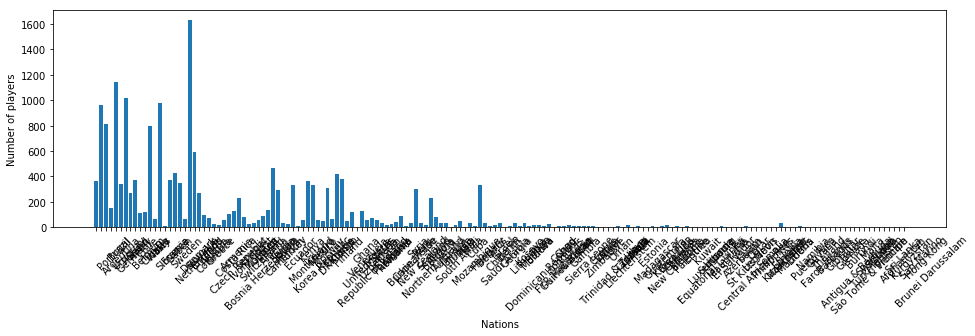

In [137]:
#Show the number of player per country
nations = {'Nation': 0}
def count_nations(nation):
    if (nation in nations):
        nations[nation] = nations[nation]+1
    else:
        nations[nation] = 1

processed_df['Nationality'].apply(count_nations)
nations.pop('Nation', None)

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(nations)), list(nations.values()))
plt.xticks(range(len(nations)), list(nations.keys()), rotation=45,  ha='left')
plt.xlabel('Nations')
plt.ylabel('Number of players')
plt.show()


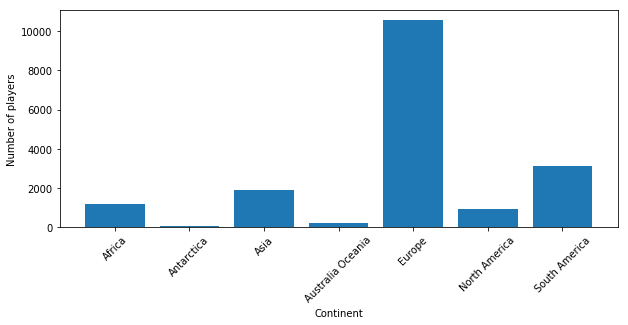

In [138]:
continent_list = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

continents = {'Africa' : 0, 'Antarctica' : 0,'Asia' : 0, 'Australia Oceania' : 0, 'Europe' : 0, 'North America' : 0, 'South America' : 0}
def count_continent(nation):
    for continent in continent_list:
        if nation in continent_list[continent]:
            continents[continent] = continents[continent] + 1
            return continent
    return np.NaN

processed_df['Nationality'].apply(count_continent)

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(range(len(continents)), list(continents.values()))
plt.xticks(range(len(continents)), list(continents.keys()), rotation = 45)
plt.xlabel('Continent')
plt.ylabel('Number of players')
plt.show()

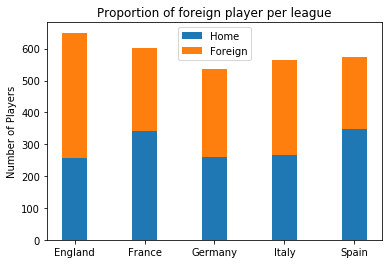

In [129]:
#The proportion of foreign player per league
club_list_per_league = {
    'England' : ['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal', 'Tottenham Hotspur', 'Liverpool', 'Leicester City', 'Southampton', 'Everton', 'Swansea City', 'Stoke City', 'West Ham United', 'Watford', 'Bournemouth', 'Crystal Palace', 'West Bromwich Albion', 'Burnley', 'Newcastle United', 'Brighton & Hove Albion', 'Huddersfield Town'],
    'France' : ['Paris Saint-Germain', 'AS Monaco', 'AS Saint-Étienne', 'Olympique de Marseille', 'Olympique Lyonnais', 'OGC Nice', 'Girondins de Bordeaux', 'Stade Rennais FC', 'Montpellier Hérault SC', 'FC Nantes', 'En Avant de Guingamp', 'Amiens SC Football', 'Dijon FCO', 'Angers SCO', 'LOSC Lille', 'RC Strasbourg', 'SM Caen', 'Toulouse FC', 'ES Troyes AC', 'FC Metz'],
    'Germany' : ['FC Bayern Munich', 'Borussia Dortmund', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'RB Leipzig', 'Borussia Mönchengladbach', 'TSG 1899 Hoffenheim', 'SV Werder Bremen', 'VfL Wolfsburg', 'Hertha BSC Berlin', 'Eintracht Frankfurt', 'VfB Stuttgart', 'Eintracht Braunschweig', 'FC Augsburg', '1. FSV Mainz 05', 'Hamburger SV', 'Hannover 96', 'SC Freiburg'],
    'Italy' : ['Juventus', 'Milan', 'Napoli', 'Inter', 'Roma', 'Torino', 'Lazio', 'Genoa', 'Sassuolo', 'Sampdoria', 'Fiorentina', 'Atalanta', 'Sampdoria', 'Bologna', 'Chievo Verona', 'Udinese', 'Cagliari', 'Ferrara (SPAL)', 'Crotone', 'Hellas Verona', 'Benevento Calcio'],
    'Spain' : ['Real Madrid CF', 'FC Barcelona', 'Atletico Madrid', 'Athletic Club de Bilbao','1. FC Köln', 'Villarreal CF', 'Real Sociedad', 'UD Las Palmas', 'RC Celta de Vigo', 'RCD Espanyol', 'SD Eibar', 'Valencia CF', 'Sevilla FC', 'RC Deportivo de La Coruña', 'Real Betis Balompié', 'Getafe CF', 'Girona CF', 'Deportivo Alav√©s', 'Levante UD', 'Deportivo Alavés', 'Málaga CF'],
}

two_columns = processed_df[['Nationality', 'Club']]

nationality_proportion = {'England' : [0, 0], 'France' : [0, 0], 'Germany' : [0, 0], 'Italy' : [0, 0], 'Spain' : [0, 0]}
def count_foreign_players():
    index = 0
    while (index < len(two_columns)):
        for country in club_list_per_league:
            if two_columns['Club'][index] in club_list_per_league[country]:
                if two_columns['Nationality'][index] == country:
                    nationality_proportion[country][0] = nationality_proportion[country][0] + 1
                else:
                    nationality_proportion[country][1] = nationality_proportion[country][1] + 1
        index += 1

count_foreign_players()
N = 5
home = (nationality_proportion['England'][0], nationality_proportion['France'][0], nationality_proportion['Germany'][0], nationality_proportion['Italy'][0], nationality_proportion['Spain'][0])
foreign = (nationality_proportion['England'][1], nationality_proportion['France'][1], nationality_proportion['Germany'][1], nationality_proportion['Italy'][1], nationality_proportion['Spain'][1])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
p1 = ax.bar(ind, home, width)
p2 = ax.bar(ind, foreign, width, bottom = home)
plt.ylabel('Number of Players')
plt.title('Proportion of foreign player per league')
plt.xticks(ind, ('England', 'France', 'Germany', 'Italy', 'Spain'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Home', 'Foreign'))
plt.show()

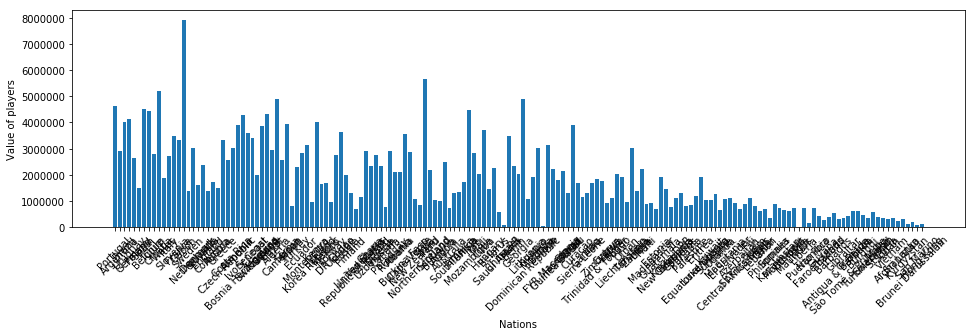

In [140]:
#Player value per nation
value_per_nation = {'Nation': 0}
def sum_values(series):
    if series[1][-1] == 'M':
        value = float(series[1][1:-1])*1000000
    elif series[1][-1] == 'K':
        value = float(series[1][1:-1])*1000
    else:
        value = float(series[1][1:])
    if (series[0] in value_per_nation):
        value_per_nation[series[0]] += value
    else:
        value_per_nation[series[0]] = value

nationality_value = processed_df[['Nationality', 'Value']]
nationality_value.apply(sum_values, 1)
value_per_nation.pop('Nation', None)

for nation in value_per_nation:
    value_per_nation[nation] = value_per_nation[nation] / float(nations[nation])

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(value_per_nation)), list(value_per_nation.values()))
plt.xticks(range(len(value_per_nation)), list(value_per_nation.keys()), rotation = 45)
plt.xlabel('Nations')
plt.ylabel('Value of players')
plt.show()

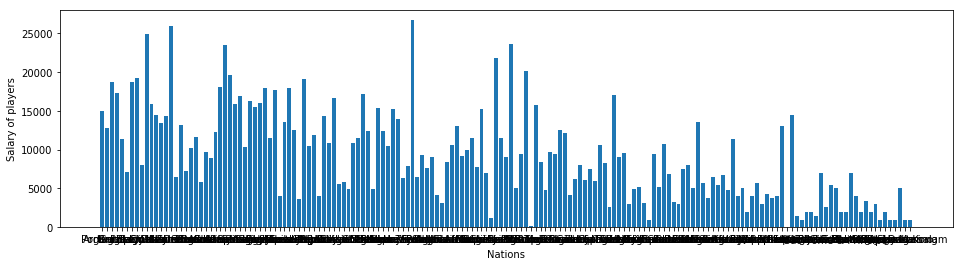

In [127]:
#Player salary per nation
salary_per_nation = {'Nation': 0}
def sum_salaries(series):
    if series[1][-1] == 'K':
        salary = float(series[1][1:-1])*1000
    else:
        salary = float(series[1][1:])
    if (series[0] in salary_per_nation):
        salary_per_nation[series[0]] += salary
    else:
        salary_per_nation[series[0]] = salary

nationality_salary = processed_df[['Nationality', 'Wage']]
nationality_salary.apply(sum_salaries, 1)
salary_per_nation.pop('Nation', None)

for nation in value_per_nation:
    salary_per_nation[nation] = salary_per_nation[nation] / float(nations[nation])

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(range(len(salary_per_nation)), list(salary_per_nation.values()))
plt.xticks(range(len(salary_per_nation)), list(salary_per_nation.keys()), rotation = 45)
plt.xlabel('Nations')
plt.ylabel('Salary of players')
plt.show()

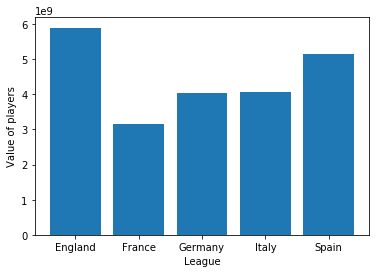

In [126]:
#Player value per league 
value_per_league = {'League': 0}
def sum_values(series):
    if series[1][-1] == 'M':
        value = float(series[1][1:-1])*1000000
    elif series[1][-1] == 'K':
        value = float(series[1][1:-1])*1000
    else:
        value = float(series[1][1:])

    for league in club_list_per_league:
        if series[0] in club_list_per_league[league]:
            league_value[league] += value
            return league
    return np.NaN

league_value = {'England' : 0, 'France' : 0, 'Germany' : 0, 'Italy' : 0, 'Spain' : 0}

club_value = processed_df[['Club', 'Value']]
club_value.apply(sum_values, 1)
value_per_league.pop('League', None)

for league in value_per_league:
    league_value[league] = league_value[league] / (float(nationality_proportion[league][0])+float(nationality_proportion[league][1]))

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(league_value)), list(league_value.values()))
plt.xticks(range(len(league_value)), list(league_value.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
plt.show()

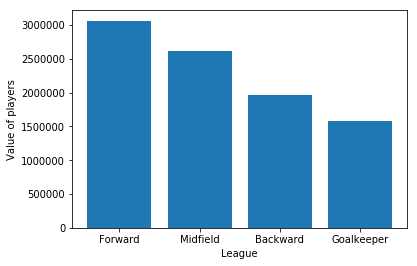

In [125]:
#Player value per position
position_list = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Backward' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK'],
}
sum_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
player_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}
average_per_position = {'Forward': 0, 'Midfield': 0, 'Backward': 0, 'Goalkeeper': 0}

def sum_values(series):
    already_counted = [0, 0, 0, 0]
    preferred_position_list = re.sub("[^\w]", " ",  series[0]).split()
    if series[1][-1] == 'M':
        value = float(series[1][1:-1])*1000000
    elif series[1][-1] == 'K':
        value = float(series[1][1:-1])*1000
    else:
        value = float(series[1][1:])

    index = 0
    for preferred_position in preferred_position_list:
        for position in position_list:
            if preferred_position in position_list[position]:
                if(not already_counted[index]):
                    sum_per_position[position] += value
                    player_per_position[position] += 1                    
                    already_counted[index] = 1
                    
                    
position_value = processed_df[['Preferred Positions', 'Value']]
position_value.apply(sum_values, 1)

for position in value_per_position:
    average_per_position[position] = sum_per_position[position] / player_per_position[position]

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.bar(range(len(average_per_position)), list(average_per_position.values()))
plt.xticks(range(len(average_per_position)), list(average_per_position.keys()))
plt.xlabel('League')
plt.ylabel('Value of players')
plt.show()

In [95]:
#Player value per skill

In [96]:
#Versatility and value

In [97]:
#Potential and Value

In [ ]:
#Age and value